In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dateutil import parser as dtparser
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn import model_selection

%matplotlib notebook

In [2]:
def load_data(file):
    csv_data = pd.read_csv(file, index_col='Day', parse_dates=['Day', 'Fiscal Week'], date_parser=lambda s: dtparser.parse(s).date())
    return csv_data

file = 'SalesData.csv'
data = load_data(file)
data.head()

,Fiscal Season,SeasonDesc,Fiscal Year,Fiscal Week,Dayofweek,Class,ClassDesc,Location,Locdesc,SalesU,SalesD
Day,,,,,,,,,,,
2016-01-31,20161,Spring 2016,2016,2016-02-06,Sunday,10,SUNGLASSES,2061,TIMES SQUARE,2,60
2016-01-31,20161,Spring 2016,2016,2016-02-06,Sunday,15,FASHION ACCESSORIES,2061,TIMES SQUARE,1,18
2016-01-31,20161,Spring 2016,2016,2016-02-06,Sunday,18,HATS,2061,TIMES SQUARE,1,12
2016-01-31,20161,Spring 2016,2016,2016-02-06,Sunday,25,FASHION JEWELRY,2061,TIMES SQUARE,-1,-35
2016-01-31,20161,Spring 2016,2016,2016-02-06,Sunday,26,NECKLACES,2061,TIMES SQUARE,11,231


In [3]:
class10_sales_data = data.query('Class==10').SalesD.astype('float')
class10_sales_data.head(10)

Day
2016-01-31     60.0
2016-02-01     72.0
2016-02-02     90.0
2016-02-03     85.0
2016-02-04     60.0
2016-02-05     90.0
2016-02-06     30.0
2016-02-07     29.0
2016-02-12    120.0
2016-02-13    254.0
Name: SalesD, dtype: float64

In [4]:
# Fill in missing values (some dates are missing in the index)
start_date = class10_sales_data.index[0].date()
end_date = class10_sales_data.index[-1].date()
date_range = pd.date_range(start_date, end_date)
X = class10_sales_data.reindex(date_range, fill_value=0).values

In [5]:
X_train, X_test = model_selection.train_test_split(X, test_size = 0.2)
X_train.size, X_test.size

(588, 147)

In [34]:
import math
X_train = list(X_train)

predicted = []
error = []
for i in range(len(X_test)):
    # Rebuild Model every iteration
    model = ARIMA(X_train, order = (5,1,0)).fit()
    
    # Predict test data
    predicted.append(model.forecast()[0])
    
    # Update training data
    X_train.append(X_test[i])
    
    #Calculate error
    error.append(math.fabs(predicted[i][0] - X_test[i]))

    print('%f, predicted=%f, expected=%f, error=%f' % (i, predicted[i][0], X_test[i], error[i]))

predicted=-0.127295, expected=0.000000, error=0.127295
predicted=-0.127133, expected=75.000000, error=75.127133
predicted=10.869914, expected=30.000000, error=19.130086
predicted=17.311519, expected=100.000000, error=82.688481
predicted=30.237505, expected=105.000000, error=74.762495
predicted=50.845478, expected=45.000000, error=5.845478
predicted=58.891534, expected=52.000000, error=6.891534
predicted=66.490915, expected=72.000000, error=5.509085
predicted=69.546073, expected=60.000000, error=9.546073
predicted=73.389011, expected=0.000000, error=73.389011
predicted=55.694192, expected=123.000000, error=67.305808
predicted=57.055593, expected=90.000000, error=32.944407
predicted=68.015301, expected=75.000000, error=6.984699
predicted=67.048073, expected=90.000000, error=22.951927
predicted=71.259307, expected=75.000000, error=3.740693
predicted=77.618180, expected=146.000000, error=68.381820
predicted=98.219851, expected=54.000000, error=44.219851
predicted=89.509964, expected=45.000

predicted=89.755655, expected=80.000000, error=9.755655
predicted=89.202344, expected=0.000000, error=89.202344
predicted=83.574037, expected=90.000000, error=6.425963
predicted=74.290614, expected=154.000000, error=79.709386
predicted=76.138204, expected=90.000000, error=13.861796


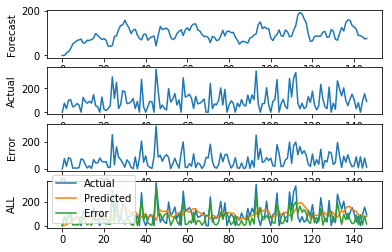

In [46]:
plt.subplot(4, 1, 1)
plt.plot(predicted)
plt.ylabel('Forecast')

plt.subplot(4, 1, 2)
plt.plot(X_test)
plt.ylabel('Actual')

plt.subplot(4, 1, 3)
plt.plot(error)
plt.ylabel('Error')

plt.subplot(4, 1, 4)
plt.plot()
plt.ylabel('ALL')

plt.plot(X_test, label='Actual')
plt.plot(predicted, label='Predicted')
plt.plot(error, label='Error')
plt.legend()

In [48]:
# Calculate errors
mse = mean_squared_error(X_test, predicted)
print("MSE = {:.4f}".format(mse))

MSE = 7531.4470
